In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [2]:
""" Your code hear: """
train = pd.read_csv('./data/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000


## 取出連續型特徵 (方便降維)

In [3]:
""" Your code hear: """
# 判斷每個特徵的類型
#continual = [f for f in train.columns if train.dtypes[f] != 'object']
#continual.remove('Id')
#continual.remove('SalePrice')

continual = train.columns[(train.dtypes!='object')]
continual_train = train[continual]
continual_train = continual_train.drop(columns=['Id'])
print(f'continual: {len(continual_train.columns)}')
print(continual_train)

continual: 37
      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         60.0    21930            5            5       2005   
1             60         68.0    10769            8            5       2007   
2            120         34.0     4590            8            5       2006   
3             50         60.0     9600            5            8       1925   
4             80         94.0     7819            6            5       1976   
...          ...          ...      ...          ...          ...        ...   
1090          70         51.0     9842            5            6       1921   
1091          50         51.0     6120            7            5       1931   
1092          20         60.0     7200            7            5       2006   
1093          20         88.0    10994            8            5       2005   
1094          20         60.0     7200            5            8       1950   

      YearRemodAdd  MasVnrArea  BsmtF

## 分析缺失值

MasVnrArea       7
GarageYrBlt     67
LotFrontage    191
dtype: int64


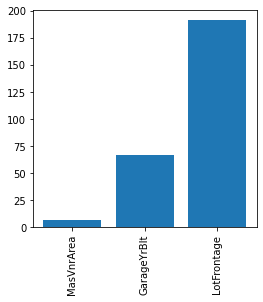

In [4]:
""" Your code hear: 練習印出缺失值圖表 """
missing = continual_train.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
print(missing)

plt.figure(figsize = (4, 4))
plt.bar(list(missing.index), np.array(missing))
plt.xticks(rotation='vertical')
plt.show()

## 去除缺失值

In [5]:
""" Your code hear: 去除缺失值 """
continual_train = continual_train.dropna()
print(continual_train)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         60.0    21930            5            5       2005   
1             60         68.0    10769            8            5       2007   
2            120         34.0     4590            8            5       2006   
3             50         60.0     9600            5            8       1925   
4             80         94.0     7819            6            5       1976   
...          ...          ...      ...          ...          ...        ...   
1090          70         51.0     9842            5            6       1921   
1091          50         51.0     6120            7            5       1931   
1092          20         60.0     7200            7            5       2006   
1093          20         88.0    10994            8            5       2005   
1094          20         60.0     7200            5            8       1950   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFin

## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [12]:
""" Your code hear: """
x = np.asarray(continual_train.drop(columns=['SalePrice']))
x = (x - x.mean(axis = 0)) / x.std(axis = 0)
y = continual_train['SalePrice']
arr_y = np.asarray(y, dtype = 'float')
arr_y_iqr = np.percentile(arr_y, (25, 50, 75), interpolation='midpoint')

# 將 Y 依照四分位距分成四類
class_y = []
for i in arr_y:
    if i < arr_y_iqr[0]:
        yyy = 0
        class_y.append(yyy)
    elif arr_y_iqr[0] <= i < arr_y_iqr[1]:
        yyy = 1
        class_y.append(yyy)
    elif arr_y_iqr[1] <= i < arr_y_iqr[2]:
        yyy = 2
        class_y.append(yyy)
    elif arr_y_iqr[2] <= i:
        yyy = 3
        class_y.append(yyy)

class_y = np.array(class_y)
print(x.shape)
print(y.shape)

(838, 36)
(838,)


## 利用 TSNE 降維

In [13]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
X_tsne = tsne.fit_transform(x)

print(X_tsne)

[[ 12.259357  -8.504818]
 [ 17.85247   -8.920409]
 [  8.501898  15.310012]
 ...
 [ 10.820138  16.367702]
 [ 18.424837   9.536295]
 [-15.332134  -7.840783]]


## 做圖

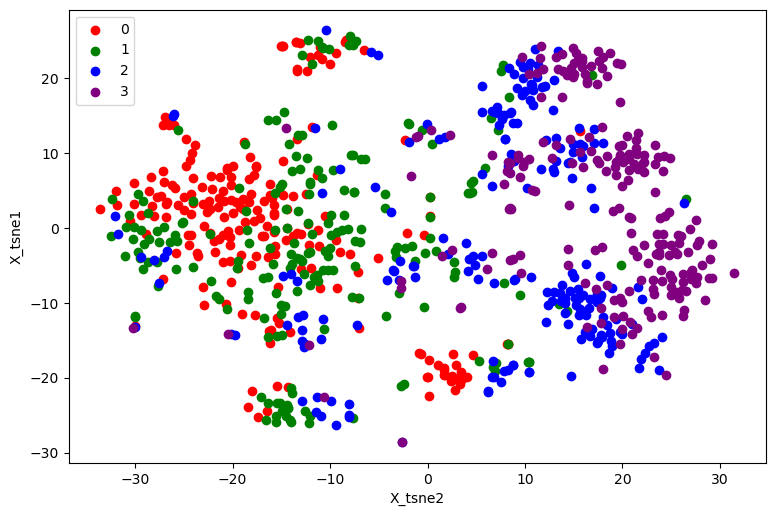

In [14]:
""" Your code hear: """
X_tsne = pd.DataFrame(X_tsne)
X_tsne.columns = ['X_tsne1','X_tsne2']
X_tsne['label'] = class_y


X_tsne_0 = X_tsne[X_tsne['label']==0]
X_tsne_1 = X_tsne[X_tsne['label']==1]
X_tsne_2 = X_tsne[X_tsne['label']==2]
X_tsne_3 = X_tsne[X_tsne['label']==3]



plt.figure(figsize = (9, 6), dpi = 100)
plt.scatter(X_tsne_0['X_tsne1'], X_tsne_0['X_tsne2'],c='red',label=X_tsne['label'])
plt.scatter(X_tsne_1['X_tsne1'], X_tsne_1['X_tsne2'],c='green',label=X_tsne['label'])
plt.scatter(X_tsne_2['X_tsne1'], X_tsne_2['X_tsne2'],c='blue',label=X_tsne['label'])
plt.scatter(X_tsne_3['X_tsne1'], X_tsne_3['X_tsne2'],c='purple',label=X_tsne['label'])
plt.ylabel('X_tsne1', fontsize = 10)
plt.xlabel('X_tsne2', fontsize = 10)
plt.legend(np.unique(X_tsne['label']),loc='upper left')
plt.show()

## 1. 請問同學從降維後的圖表中可以看出什麼現象？

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？

### ANS:
#### 1.  四個類別的點重合性高，相互有重疊到
#### 2. 未考慮資料本身的分配以及離散的狀況